In [1]:
# !pip install pandas
import pandas as pd
import os

In [6]:
file_dir = "/home/huyhoang/Workspace/DIT-Master/MSS-2/AlgorithmAutonomousSystems/rcognita-edu/rosdata/N_CTRL/Init_angle_1.5707963267948966_seed_1_Nactor_3/"
fn = os.listdir(file_dir)
fn = sorted(fn, key=lambda x: int(x.split(".")[0]))[-1]

file_path = os.path.join(
    file_dir,
    fn
)
with open(file_path) as f:
    data = f.read().splitlines()[20:]

data
fn

'1719829473.942857__3wrobotNI__N_CTRL__2024-07-01__12h24m33s__run01.csv'

In [7]:
headers = data[0].split(",")
data_dict = {}
for line in data[1:]:
    line_info = line.split(",")
    for idx, header in enumerate(headers):
        if header not in data_dict:
            data_dict[header] = [float(line_info[idx])]
        else:
            data_dict[header].append(float(line_info[idx]))

df = pd.DataFrame(data_dict)
df

,t [s],x [m],y [m],alpha [rad],stage_obj,accum_obj,v [m/s],omega [rad/s]
0,0.200278,-1.000974,-0.998998,0.061699,10.985725,0.109857,0.220000,0.168691
1,0.300258,-1.000520,-0.998970,0.062414,10.984339,0.219701,0.220000,0.168605
2,0.400265,-0.989591,-0.998154,0.087828,10.950112,0.329202,0.220000,0.164945
3,0.500256,-0.971225,-0.996374,0.099084,10.880707,0.438009,0.220000,0.164755
4,0.600267,-0.950902,-0.994334,0.102928,10.801807,0.546027,0.220000,0.166220
...,...,...,...,...,...,...,...,...
212,21.400240,-0.008620,-0.052501,1.886065,3.584879,10.398745,0.009045,-0.034499
213,21.500242,-0.008941,-0.051514,1.883040,3.572458,10.434470,0.008888,-0.036019
214,21.600264,-0.009196,-0.050719,1.879965,3.560079,10.470071,0.008763,-0.037165
215,21.700246,-0.009395,-0.050092,1.876618,3.546876,10.505540,0.008664,-0.037918


<Axes: title={'center': 'runned trajectory'}, xlabel='x [m]'>

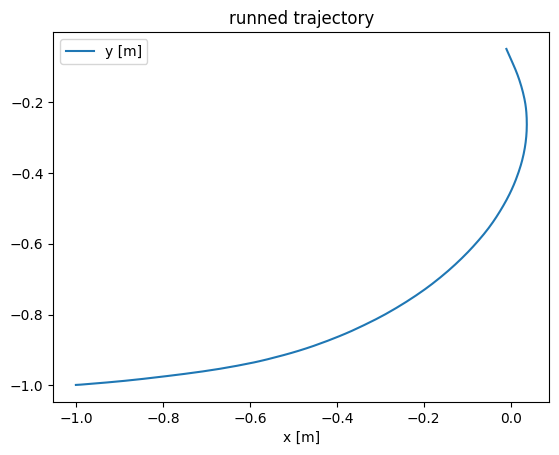

In [8]:
# df.drop(columns=["t [s]", "stage_obj", "accum_obj"]).plot()
df = df[df["t [s]"] > 0.0005]
df.plot(x="x [m]", y="y [m]", title="runned trajectory")

<Axes: title={'center': 'runned trajectory'}, xlabel='t [s]'>

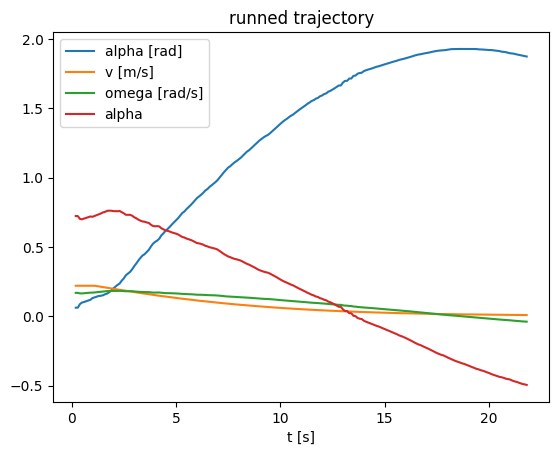

In [9]:
import numpy as np

df["alpha"] = df.apply(lambda row:-row["alpha [rad]"] + np.arctan2(-row["y [m]"], -row["x [m]"]), axis=1)
# df.plot(x="t [s]", y="alpha", title="runned trajectory")
df.plot(x="t [s]", y=["alpha [rad]", "v [m/s]", "omega [rad/s]", "alpha"], title="runned trajectory")